In [1]:
#include <iostream>
using namespace std;

## 9.1 单独编译

可以将函数原型放在头文件中。因此，可以将原来的程序分成三
部分。
- 头文件：包含结构声明和使用这些结构的函数的原型。
- 源代码文件：包含与结构有关的函数的代码。
- 源代码文件：包含调用与结构相关的函数的代码。


头文件中常包含的内容。
- 函数原型。
- 使用#define或const定义的符号常量。
- 结构声明。
- 类声明。
- 模板声明。
- 内联函数

> 因为jupyter限制，这里就只贴图片

我们可以定义一个 `coordin.h` ，内容如下

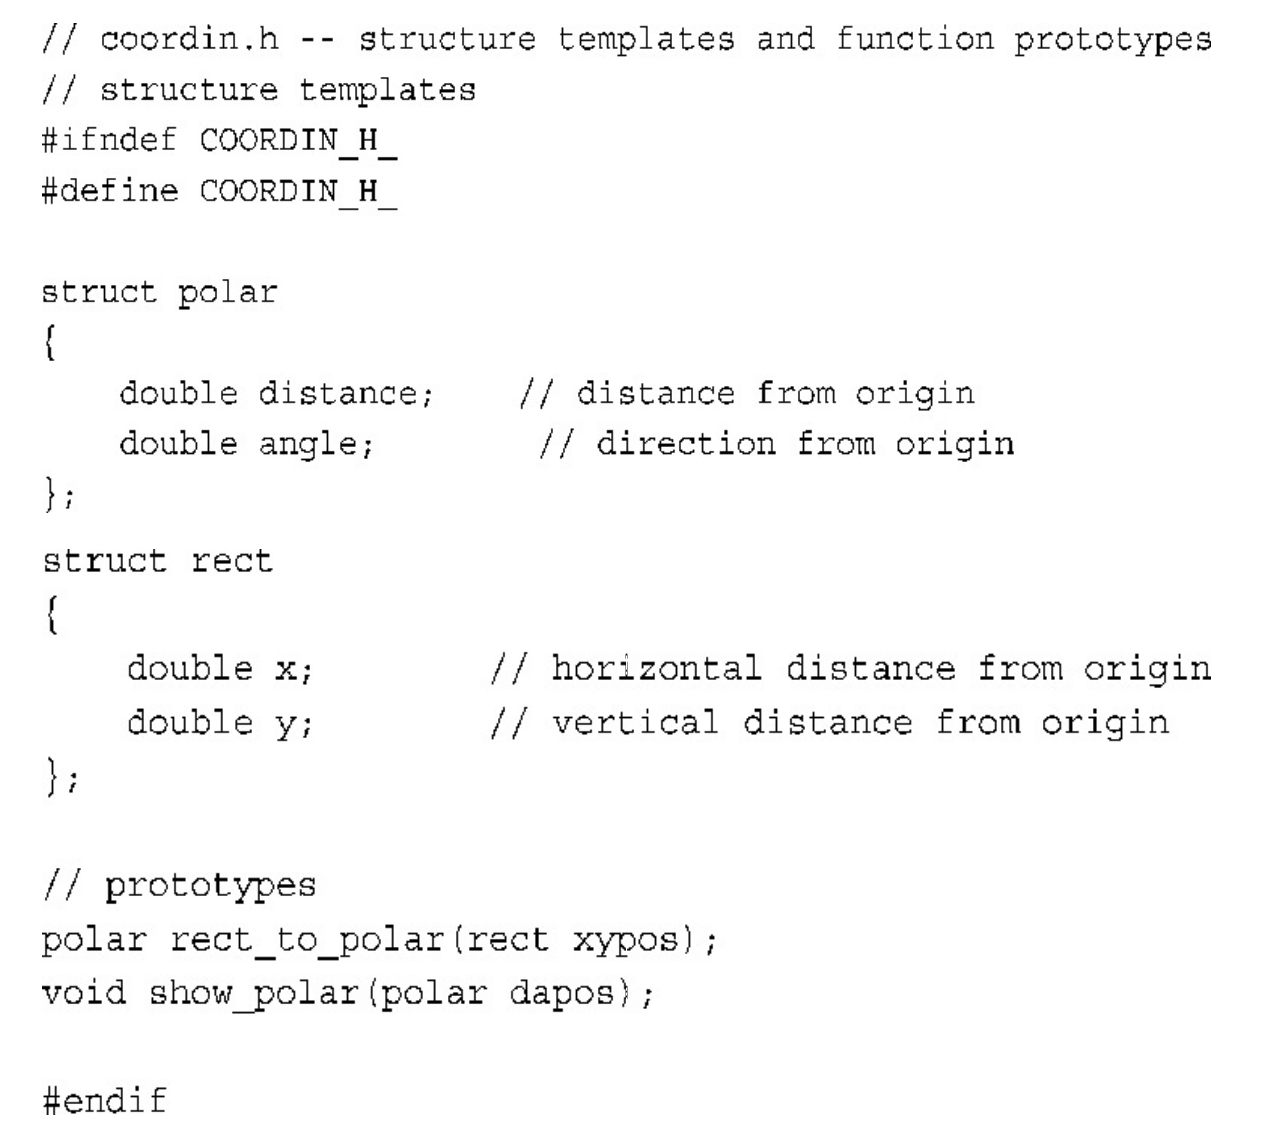

然后我们可以看一下unix系统的编译原理
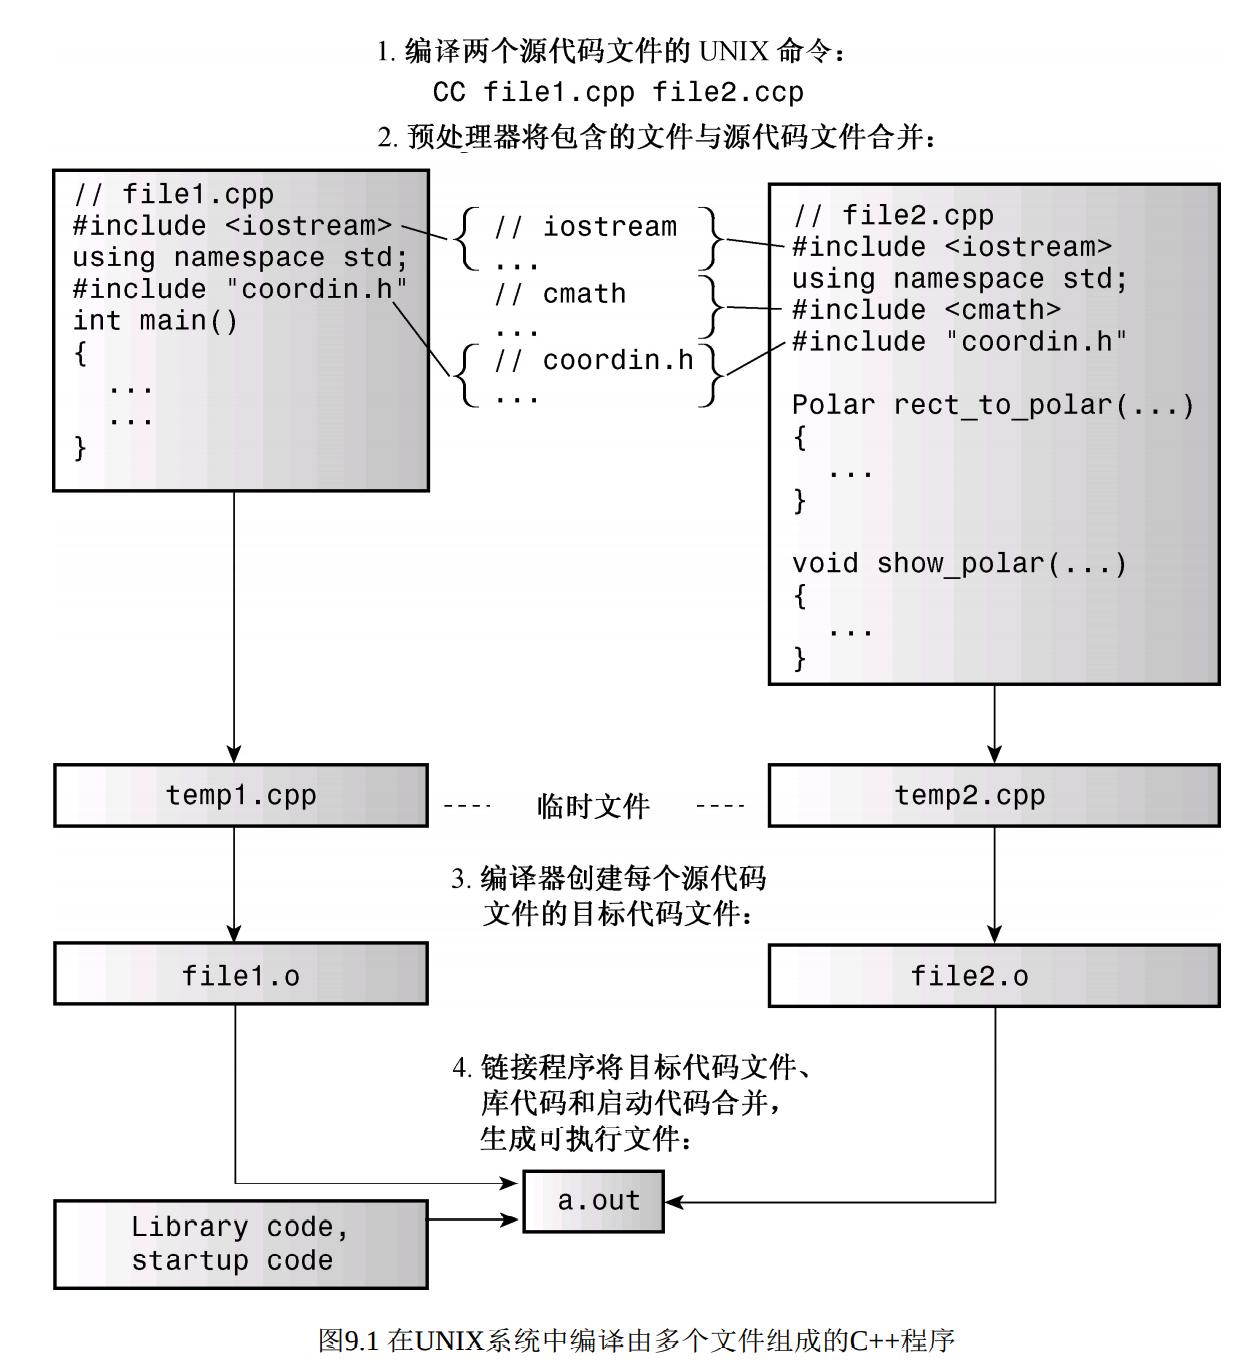

下面这个可以避免重定义，如果定义了就不会再定义了
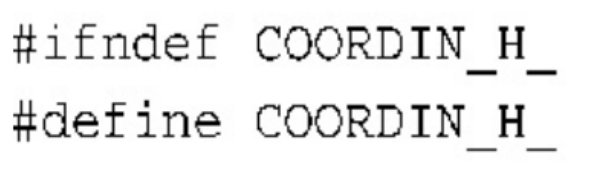

然后我们看另外一个文件
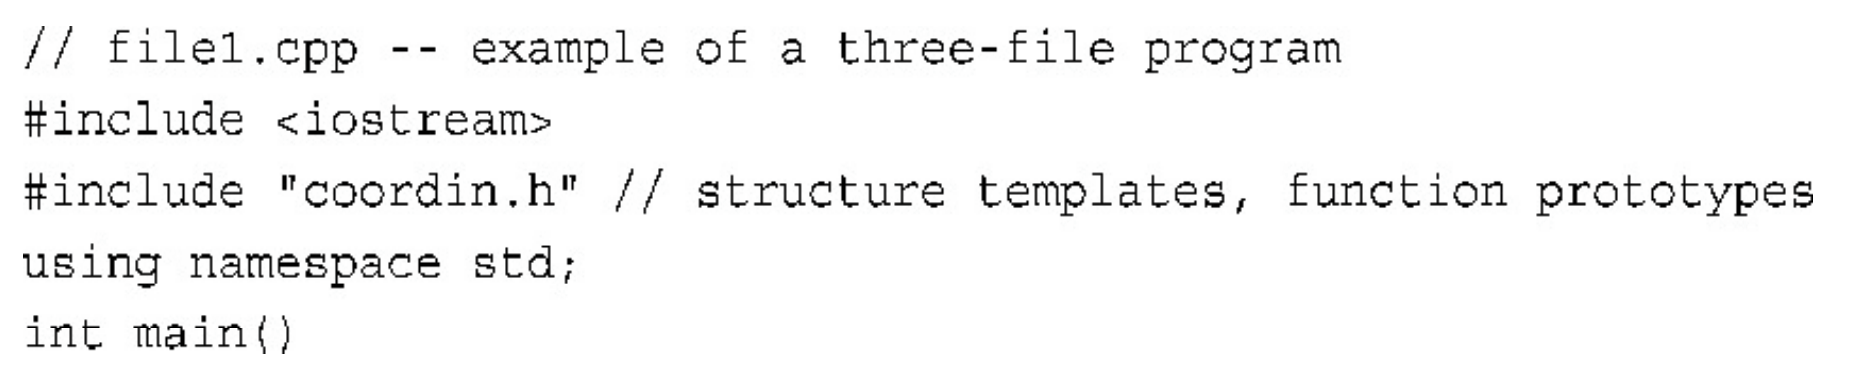

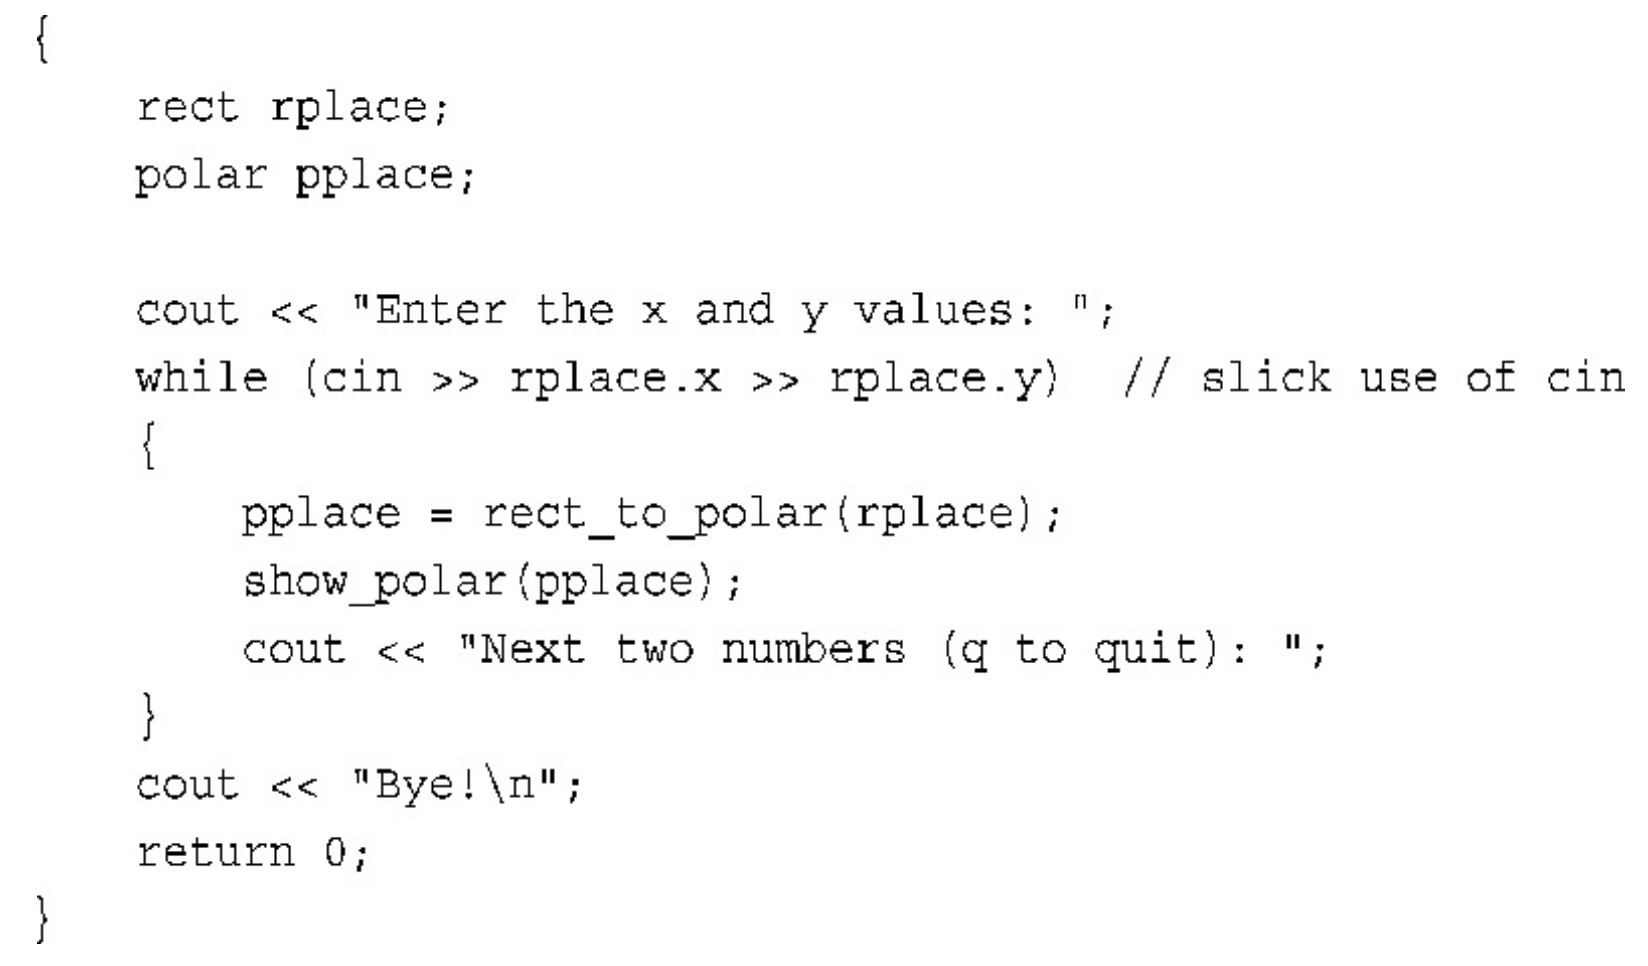

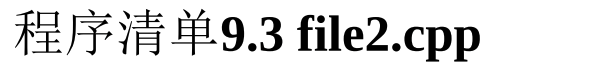


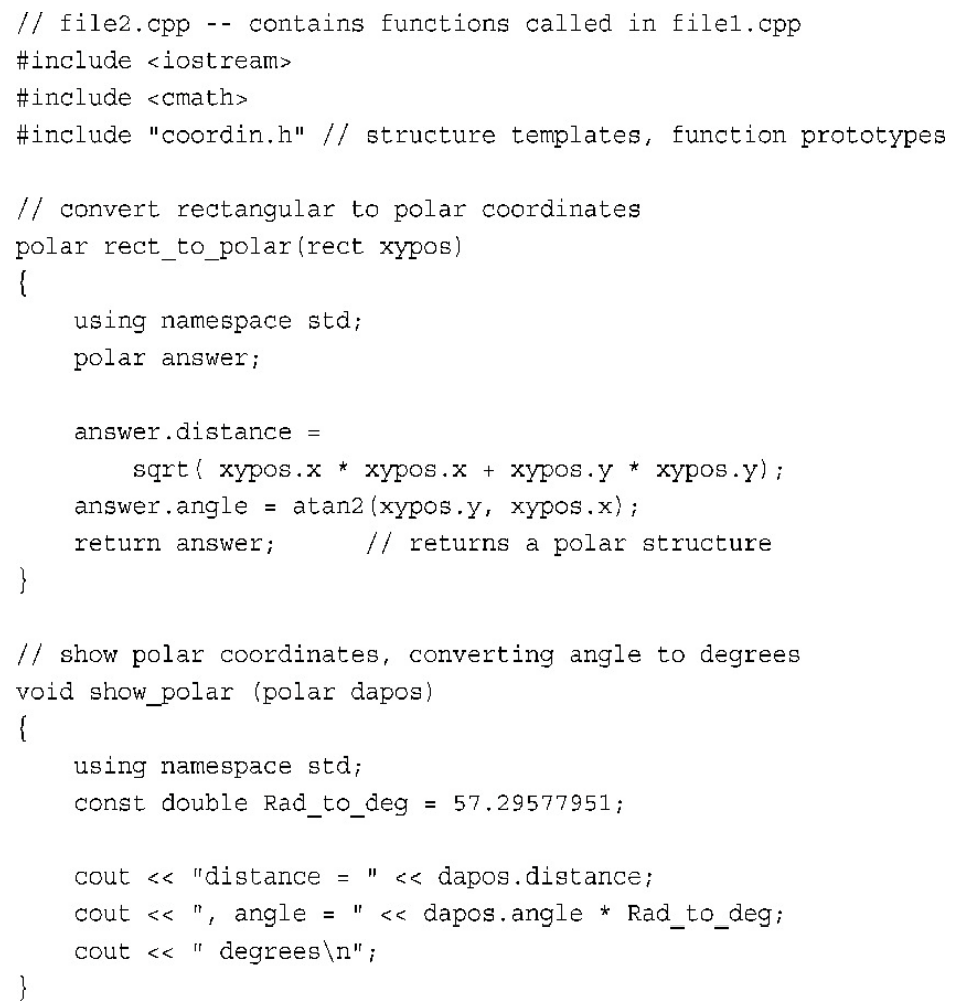

把这两个源代码和可执行文件一起编译可以生成一个可执行程序，程序运行结果如下
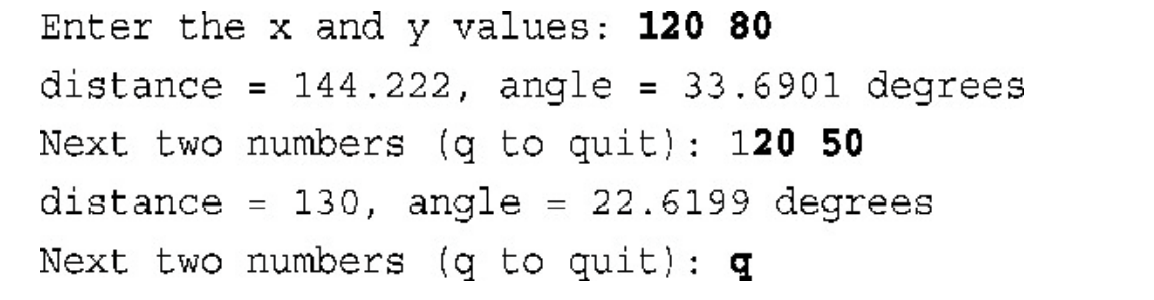

## 9.2 存储持续性、作用域和链接性

- 自动存储持续性：在函数定义中声明的变量（包括函数参数）的存
储持续性为自动的。它们在程序开始执行其所属的函数或代码块时
被创建，在执行完函数或代码块时，它们使用的内存被释放。
C++有两种存储持续性为自动的变量。
- 静态存储持续性：在函数定义外定义的变量和使用关键字static定义
的变量的存储持续性都为静态。它们在程序整个运行过程中都存
在。C++有3种存储持续性为静态的变量。
- 线程存储持续性（C++11）：当前，多核处理器很常见，这些CPU
可同时处理多个执行任务。这让程序能够将计算放在可并行处理的
不同线程中。如果变量是使用关键字thread_local声明的，则其生命
周期与所属的线程一样长。本书不探讨并行编程。
- 动态存储持续性：用new运算符分配的内存将一直存在，直到使用
delete运算符将其释放或程序结束为止。这种内存的存储持续性为
动态，有时被称为自由存储（free store）或堆（heap）。

静态变量有三种类型
- 要想创建链接性为外部的静态持续变量，必须在代码块的外面声明它；
- 要创建链接性为内部的静态持续变量，必须在代码块的外面声明它，并使用static限定符；
- 要创建没有链接性的静态持续变量，必须在代码块内声明它，并使用static限定符。

In [4]:
// 我们可以演示一下函数内容的静态变量
void func(){
    static int a = 0;
    a++;
    cout<<a<<endl;
}
// 当我们多次调用函数的时候里面的静态变量不会重置
func();
func();
func();
func();

1
2
3
4


In [6]:
// 如果我们想在多个文件中使用外部的变量，可以使用extern来声明
extern int a;

有些被称为存储说明符（storage class specifier）或cv-限定符（cvqualifier）的C++关键字提供了其他有关存储的信息。下面是存储说明
符：
- auto（在C++11中不再是说明符）；
- register；
- static；
- extern；
- thread_local（C++11新增的）；
- mutable。

其中的大部分已经介绍过了，在同一个声明中不能使用多个说明
符，但thread_local除外，它可与static或extern结合使用。

前面讲过，在C++11之前，可以在声明中使用关键字auto指出变量为自动变量；但在
C++11中，auto用于自动类型推断。

关键字register用于在声明中指示寄存器存储，而在C++11中，它只是显式地指出变量是自动的。

关键字static被用在作用域为整个文件的声明中时，表示内部链接性；被用于局部声明中，表示局部变量的存储持续性为静态的。

关键字extern表明是引用声明，即声明引用在其他地方定义的变量。

关键字thread_local指出变量的持续性与其所属线程的持续性相同。thread_local变量之于线程，犹如常规静态变量之于整个程序。

关键字mutable的含义将根据const来解释.

关键字volatile表明，即使程序代码没有对内存单元进行修改，其值
也可能发生变化。听起来似乎很神秘，实际上并非如此。例如，可以将
一个指针指向某个硬件位置，其中包含了来自串行端口的时间或信息。
在这种情况下，硬件（而不是程序）可能修改其中的内容。或者两个程
序可能互相影响，共享数据。该关键字的作用是为了改善编译器的优化
能力。例如，假设编译器发现，程序在几条语句中两次使用了某个变量
的值，则编译器可能不是让程序查找这个值两次，而是将这个值缓存到
寄存器中。这种优化假设变量的值在这两次使用之间不会变化。如果不
将变量声明为volatile，则编译器将进行这种优化；将变量声明为
volatile，相当于告诉编译器，不要进行这种优化。


In [11]:
// 现在回到mutable。可以用它来指出，即使结构（或类）变量为const，其某个成员也可以被修改。
struct data1 {
    int a;
    mutable int b;
};
const data1 a = {1,2};
a.b = 6;
cout<<a.b;

6

In [12]:
// 但是a不能去需改
a.a = 10;

input_line_19:3:5: error: cannot assign to variable 'a' with const-qualified type 'const __cling_N510::data1'
a.a = 10;
~~~ ^
input_line_18:7:14: note: variable 'a' declared const here
 const data1 a = {1,2};
 ~~~~~~~~~~~~^~~~~~~~~


Interpreter Error: 

In [13]:
// 我们可以给函数添加static关键词
static void a(int x){}
/*这意味着该函数只在这个文件中可见，还意味着可以在其他文件中
定义同名的的函数。和变量一样，在定义静态函数的文件中，静态函数
将覆盖外部定义，因此即使在外部定义了同名的函数，该文件仍将使用
静态函数*/

In [14]:
// 如果想给内置的标量初始化可以这样
int *a = new int(6);
cout<<a;

0x564638b24370

In [19]:
// 如果想初始化结构体或者数组可以这样
struct where {double x;double y;double z;};
where * one = new where {25,5.3,7.2};
cout<<one->y;

5.3

In [21]:
// 数组这样初始化
int *arr = new int[4] {2,4,6,7};
cout<<arr[2];

6

In [4]:
// new关键词可以有两种初始化，第一种是在堆上初始化，第二种是直接使用我们自己定义的buffer数组
char buffer[100];
double *p1 = new (buffer) double;
*p1 = 10;
// 可以看到，他们两个地址是一样的
cout<<p1<<endl<<&buffer;

0x7f58a0803110
0x7f58a0803110

## 9.3 名称空间

In [2]:
// 我们我们来创建名称空间
namespace Jack{
    int age;
    // 在名称空间中定义函数原型
    void print(int x);
}

In [3]:
// 名称空间是开放的，我们定义了一个名称空间可以在定义，这样就会合并进去
namespace Jack{
    int sex;
}

In [4]:
// 下面我们可以实现名称空间中的函数
namespace Jack{
    void print(int x){
        cout<<x;
    }
}

In [5]:
// 我们可以这样使用名称空间
Jack::age = 10;
Jack::sex = 1;
cout<<Jack::age<<"|"<<Jack::sex;

10|1

In [6]:
// 也可以直接调用名称空间的函数
Jack::print(66);

66

In [7]:
// 如果我们不想每次都自己声明Jack::，我们可以直接使用using命令
using Jack::age;
cout<<age;

10

In [8]:
// 也可以直接全部使用
using namespace Jack;
print(77);

77

In [2]:
// 命名空间可以连续嵌套
namespace elements{
    namespace fire {
        int flame;
        int age=20;
    }
    float water;
}

In [4]:
elements::fire::flame = 6;
cout<<elements::fire::flame;

6

In [4]:
using elements::fire::flame;
cout<<flame;

6

In [6]:
// 可以这样简化
namespace MEF = elements::fire;
using MEF::age;

In [7]:
std::cout<<age;

20

In [2]:
// 我们可以定义未命名的名称空间
namespace {
    int ice;
}

In [6]:
// 未命名的名称空间类似于静态变量
cout<<ice;

0

0